In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
print("uproot version",uproot.__version__)
print("awkward version",ak.__version__)
print("numpy version",np.__version__)
print("matplotlib version",matplotlib.__version__)
print("hist version",hist.__version__)
print("vector version",vector.__version__)

uproot version 4.1.9
awkward version 1.10.2
numpy version 1.23.5
matplotlib version 3.4.3
hist version 2.5.2
vector version 0.8.5


In [2]:
!curl 'https://cernbox.cern.ch/remote.php/dav/public-files/JIjQaAYEQnmRDkX/291694/AnalysisResults.root' > run291694.mc.root

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  100M  100  100M    0     0  2355k      0  0:00:43  0:00:43 --:--:-- 2648k


In [3]:
!file *.root
file = uproot.open("run291694.mc.root")
file.keys()
events = file["eventsTree"]
events.show()

run290223.data.root: ROOT file Version 62406 (Compression: 1)
run290223.mc.root:   ROOT file Version 62406 (Compression: 1)
run291694.mc.root:   ROOT file Version 61600 (Compression: 1)
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
runNumber            | int32_t                  | AsDtype('>i4')
xVtx                 | double                   | AsDtype('>f8')
yVtx                 | double                   | AsDtype('>f8')
zVtx                 | double                   | AsDtype('>f8')
isCINT               | bool                     | AsDtype('bool')
isCMSL               | bool                     | AsDtype('bool')
isCMSH               | bool                     | AsDtype('bool')
isCMLL               | bool                     | AsDtype('bool')
isCMUL               | bool                     | AsDtype('bool')
nMuons               | int32_t                  | AsDtype('>i4

In [4]:
m = events.arrays(["nMuons","isCMUL","isCINT","Muon_Px","Muon_Py","Muon_Pz","Muon_Charge","Muon_E","Muon_matchedTrgThreshold"],how="zip")
type(m)

awkward.highlevel.Array

Nombre d'évènements : 1232789
Nombre d'évènements avec 2 muons : 99051
Nombre d'évènements avec 2 muons de charges opposées : 71083


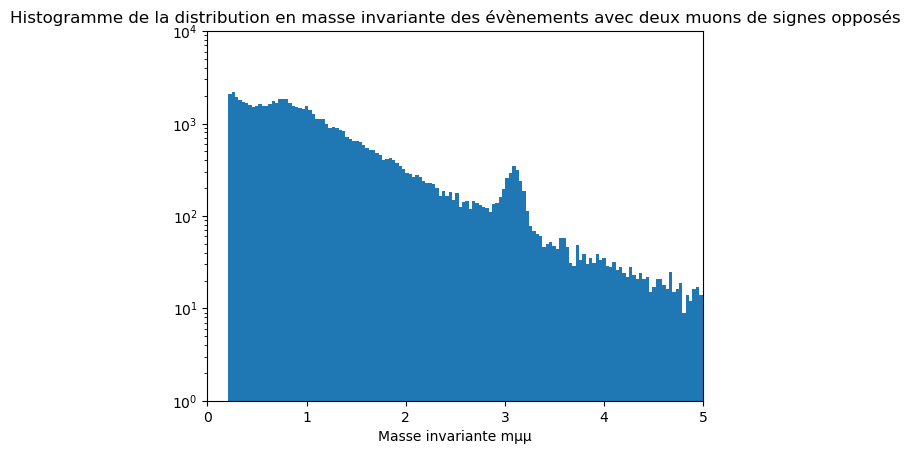

In [5]:
def p(px,py,pz):
    return np.sqrt(px**2+py**2+pz**2) #Calcul de la norme de l'impulsion

def InvariantMass(p,E):
    c=3*10**8
    return np.sqrt(E**2-p**2)
    
def chargesOpp(q0,q1):
    if q0==q1:
        return True
    elif q0==-q1:
        return False 
    
InvMass = np.array([],dtype=float)
nofTracks=0 
nofEvents=0  
nofCorrectEvents=0
for event in m[m.nMuons==2]: #On ne considère que les évènements avec 2 muons
    nofEvents+=1
    tracks = event["Muon"].to_list()
    tracks0=[tracks[0]] #1er muon
    tracks1=[tracks[1]] #2e muon
    t=tracks0[0]
    t1=tracks1[0]
    q0=t["Charge"]
    q1=t1["Charge"]
    if chargesOpp(q0,q1)==False : #On ne garde que les évènements avec 1 µ+ et 1 µ-
        valueTrig=t["matchedTrgThreshold"]
        valueTrig1=t1["matchedTrgThreshold"]
        #if valueTrig>0 and valueTrig1>0: #On ne garde pas les évènements où les traces des muons ne passent aucun seuil de trigger
        #if m[m.isCMUL==True]: #CMUL=True pour chaque évènement (dimuon passant le low treshold du trigger)
        nofCorrectEvents+=1
        E0=t["E"] 
        E1=t1["E"]
        SumE=E0+E1 #Somme des énergies des 2 muons
        Px=t["Px"]+t1["Px"]
        Py=t["Py"]+t1["Py"]
        Pz=t["Pz"]+t1["Pz"]
        Sump=p(Px,Py,Pz) #Norme de la somme vectorielle des impulsions des 2 muons
        InvMass = np.append(InvMass,InvariantMass(Sump,SumE))
plt.hist(InvMass,bins=10000);
plt.yscale("log")
plt.axis([0,5,1,10000])
plt.xlabel("Masse invariante mµµ")
plt.title("Histogramme de la distribution en masse invariante des évènements avec deux muons de signes opposés")
print("Nombre d'évènements :",len(m[m.nMuons>=0]))
print("Nombre d'évènements avec 2 muons :",len(m[m.nMuons==2]))
print("Nombre d'évènements avec 2 muons de charges opposées :",nofCorrectEvents)